The current version of `SpinPlots` works better with processed Bruker data. If you’re dealing with unprocessed data or using data from a different brand, we recommend using [NMRglue](https://www.nmrglue.com/) instead. Also, if you want more control over the looks of your plot, `SpinPlots` might feel a bit limited since it mostly sticks to the default matplotlib style for now.

In [1]:
from spinplots.plot import bruker1d, bruker1d_grid, bruker2d

The easiest way to plot a spectrum is as follows

/home/msoares/.local/lib/python3.11/site-packages/spinplots/plot.py:191: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


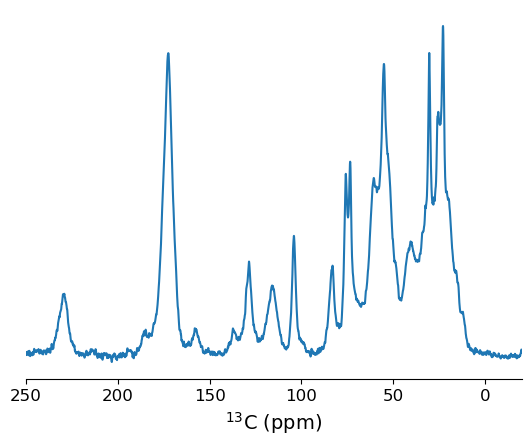

In [2]:
bruker1d(['../../data/1D/8/pdata/1'], xlim=(250, -20))

The `bruker1d` function has a bunch of useful features beyond just making a simple plot. Some of the key ones include:

- Plotting several plots together
- Plot with/without frame
- Labelling of spectra
- Normalization of data
- Saving the plot directly to a file

Here’s an example that highlights most of these features:

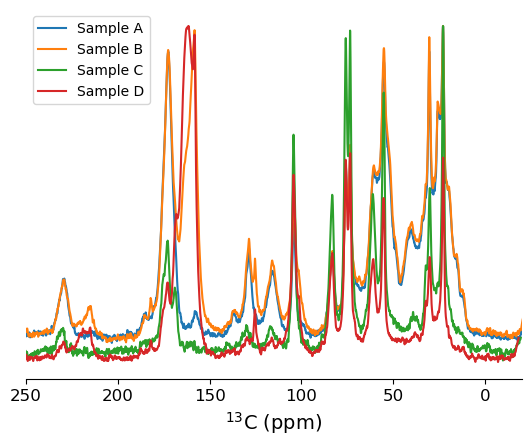

In [3]:
path = '../../data/1D/'
bruker1d([path + '8/pdata/1', path + '12/pdata/1', path + '33/pdata/1', path + '39/pdata/1'],
              labels=['Sample A', 'Sample B', 'Sample C', 'Sample D'],
              xlim=(250, -20),
              frame=False,
              normalized=True,
              save=True,
              filename='../../data/1D/overlapped',
              format='png')

You can also opt by stacking the plots, using the `stacked` keyword, as shown below:

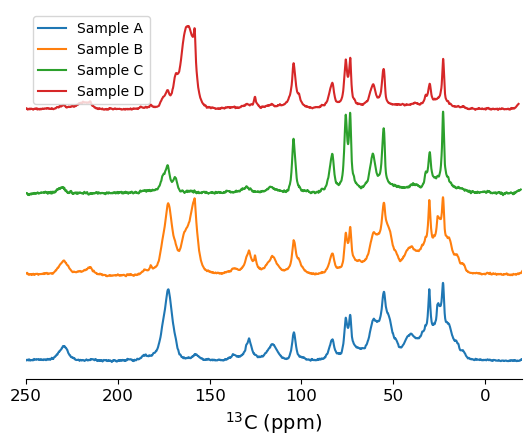

In [4]:
path = '../../data/1D/'
bruker1d([path + '8/pdata/1', path + '12/pdata/1', path + '33/pdata/1', path + '39/pdata/1'],
              labels=['Sample A', 'Sample B', 'Sample C', 'Sample D'],
              xlim=(250, -20),
              frame=False,
              normalized=True,
              stacked=True,
              save=True,
              filename='../../data/1D/stacked',
              format='png')

The `bruker1d_grid` function works similarly to `bruker1d`, but instead of overlapping the spectra, it lets you arrange them in a grid (subplots).

Here’s an example of how it works:

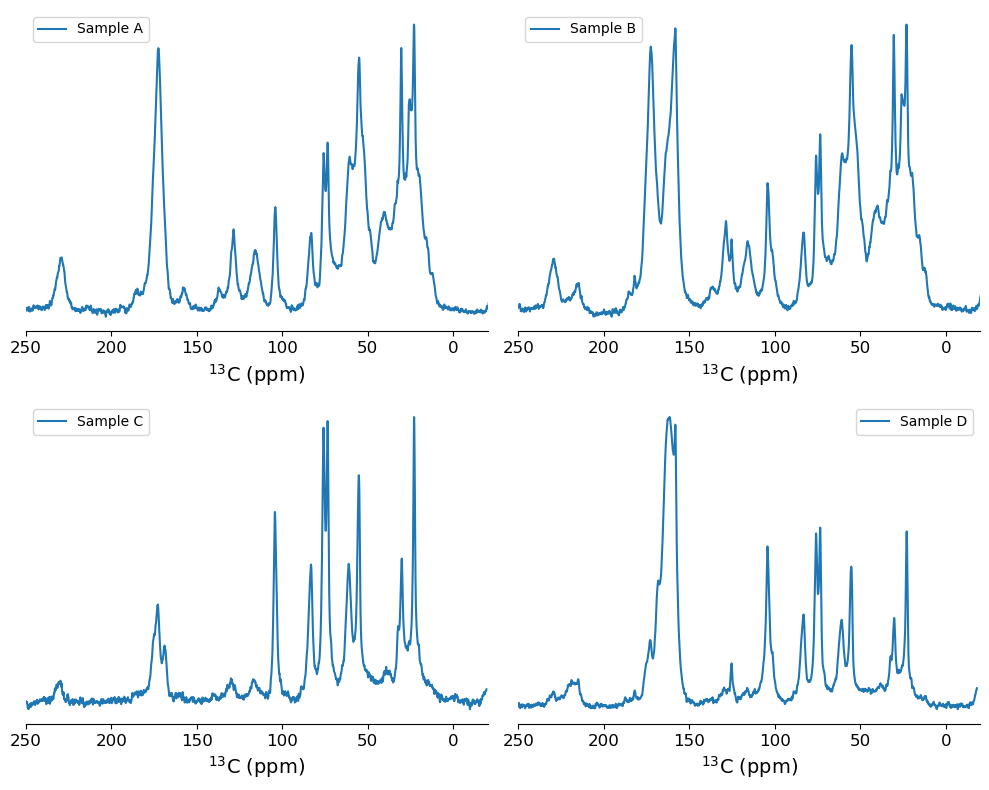

In [5]:
path = '../../data/1D/'
bruker1d_grid([path + '8/pdata/1', path + '12/pdata/1', path + '33/pdata/1', path + '39/pdata/1'],
                labels=['Sample A', 'Sample B', 'Sample C', 'Sample D'],
                xlim=(250, -20),
                subplot_dims=(2, 2),
                frame=False,
                normalized=True,
                save=True,
                filename='../../data/1D/grid',
                format='png')

Lastly, the bruker2d function makes it super easy to plot 2D NMR spectra. You just need to provide a bit more info to customize the plot. Here’s what you can specify:
- `countour_start`: the minimum value for the contour plot
- `countour_num`: how many contour levels you want
- `countour_factor`: the factor between each contour level
- `cmap`: the colormap to use (default is 'black')
- `xlim`: limits for the x-axis, i.e. direct dimension (F2)
- `ylim`: limits for the y-axis, i.e. indirect dimension (F1)
- `save`: whether you want to save the plot
- `filename`: the name to save the plot as
- `format`: the file format to save it

/home/msoares/.local/lib/python3.11/site-packages/spinplots/plot.py:63: UserWarning: The following kwargs were not used by contour: 'linewidth'
  contour_plot = ax['A'].contour(data, contour_levels, extent=(ppm_x_limits[0], ppm_x_limits[1], ppm_y_limits[0], ppm_y_limits[1]), cmap=cmap, linewidth=0.8)


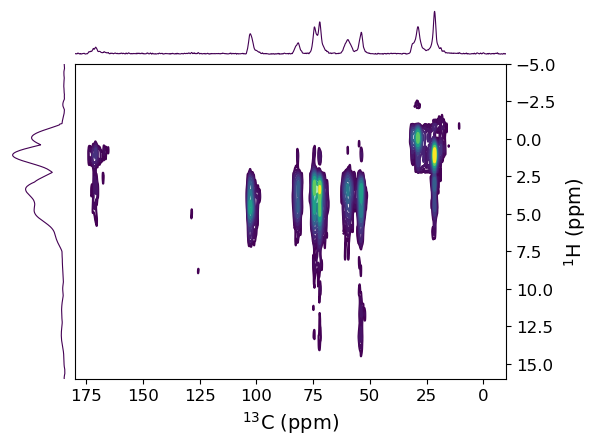

In [6]:
bruker2d('../../data/2D/36/pdata/1',
        contour_start=5e5,
        contour_num=11,
        contour_factor=1.3,
        cmap='viridis',
        xlim=(180, -10),
        ylim=(16, -5),
        save=True,
        filename='../../data/2D/2d_spectrum',
        format='png',)